Import pyton libraries for the project

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from datetime import datetime
import ast
import matplotlib.pyplot as plt

## Gathering data:

1. Get the WeRateDogs Twitter archive file

In [71]:
df=pd.read_csv('twitter-archive-enhanced.csv')

2. Download image_predictions.tsv file from internet

In [72]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)

In [73]:
file_name='image_predictions.tsv'
if not os.path.exists(file_name):
    os.mknod(file_name)
with open(file_name, 'wb') as file:
    file.write(r.content)
file.close()

In [74]:
df2=pd.read_csv('image_predictions.tsv', sep='\t')

3. Query twitter's API to gather additional data 

In [21]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [23]:
start_time = datetime.now() 
deleted_id=[]
for i in range(len(df.tweet_id)):
    try:
        tweet = api.get_status(df.tweet_id.values[i], tweet_mode='extended')
        print(df.tweet_id.values[i])
        with open('tweet_json.txt', 'a+', encoding='utf-8') as outfile:  
            outfile.write(json.dumps(str(tweet._json), indent=4))
            outfile.write('\n')
    except tweepy.TweepError as e: 
        print(df.tweet_id.values[i])
        deleted_id.append(df.tweet_id.values[i])
        print(e)
        pass
time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed)) 

outfile.close()
    

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
[{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694

In [75]:
with open('tweet_json.txt') as json_file:  
    df_list=[]
    for line in json_file:
        a=ast.literal_eval(json.loads(line))        
        df_list.append({"tweet_id":a['id'],
                        "retweet_count":a['retweet_count'],
                        "favorite_count":a['favorite_count']})

In [76]:
df3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing data:

In [26]:
tweet._json

{'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'id': 666020888022790149,
 'id_str': '666020888022790149',
 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
 'truncated': False,
 'display_text_range': [0, 131],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 666020881337073664,
    'id_str': '666020881337073664',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'url': 'https://t.co/BLDqew2Ijj',
    'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
    'type': 'photo',
    'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 960, 'h': 720, 'resize': 'fit

In [77]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
df.to_excel('data_set_1.xlsx')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [78]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
df2.to_excel('data_set_2.xlsx')

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8314,38018
1,892177421306343426,6142,32637
2,891815181378084864,4067,24559
3,891689557279858688,8458,41367
4,891327558926688256,9157,39548
5,891087950875897856,3048,19863
6,890971913173991426,2019,11615
7,890729181411237888,18443,64152
8,890609185150312448,4182,27291
9,890240255349198849,7215,31309


In [ ]:
df3.to_excel('data_set_1.xlsx')

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### Quality issues:

1. 'twitter_archive_enhanced.csv' table

rating_numerator is an integer instead of float

Some of the ratings are wrong

-Index 45, 13.5/10 is the rating instead of 5/10

-Index 55, 13/10 instead of 17/10

-Index 313, 13/10 is the rating instead of 960/0

-Index 340, 9.75/10 instead of 75/10

-Index 516, 24/7 is not a rating

-Index 695, 9.75/10 instead of 75/10

-Index 763, 11.27/10 instead of 27/10

-Index 1165, 13/10 instead of 4/20

-Index 1662, 10/10 instead of 7/11

-Index 1663, 20/16 is incorrect

-Index 1689, 9.5/10 instead of 5/10

-Index 1712 11.26/10 instead of 26/10

-Index 2235 9/10 instead of 1/2

There are retweet data which we do not need

Erroneous datatype 
(tweet_id,retweeted_status_id,retweeted_status_user_id)

Dog name "None"

Dog stage 'None'

Some dogs' name is 'a', they are either wrong name or there is no name available

some dogs' name is 'an', but actually not

tweet_id 728035342121635841, dog name is not 'all'

tweet_id 776201521193218049, dog name is not 'O'

some data are not dog rating, such as index 59, 62, 103, 131, 141

expanded_urls column have many empty values

tweet_id is integer

index 1120, the name is 'this', dog stage should be 'doggo'

2. 'tweet_json' table

-tweet_id is integer

3. 'image_predictions.tsv' table

-tweet_id is integer

### Tidiness issues:

-In 'twitter_archive_enhanced.csv' table, dog stage should be in one column

-In 'twitter_archive_enhanced.csv' table, rating_numerator and rating_denominator columns can be converted to one column as rating

-'twitter_archive_enhanced.csv' table and 'tweet_json' table can be combined into one table

## Cleaning data

Copy all the three dataframes to be used for cleaning data

In [79]:
df_clean=df.copy()

In [80]:
df2_clean=df2.copy()

In [81]:
df3_clean=df3.copy()

##### 'twitter_archive_enhanced.csv' table
######  rating_numerator is an integer datatype

###### Define
Convert integer to float for rating_numerator

###### Code

In [82]:
df_clean.rating_numerator=df_clean['rating_numerator'].astype(float)

###### Test

In [83]:
df_clean.rating_numerator.dtype

dtype('float64')

##### 'twitter_archive_enhanced.csv' table
###### Some of the ratings are wrong

###### Define
Correct the ratings, replace the woring numbers, either rating_numerator or rating_denominator or both

###### Code

In [84]:
d={45:13.5,55:13,340:9.75,695:9.75,763:11.27,1689:9.5,1712:11.26}

for key, value in d.items():
    df_clean.loc[key,['rating_numerator']]=value

###### Test

In [85]:
df_clean[df_clean.index==340]['rating_numerator']

340    9.75
Name: rating_numerator, dtype: float64

some both rating_numerator and rating_denominator need to be changed

code

In [86]:
df_clean.loc[313,['rating_numerator','rating_denominator']]=13,10
df_clean.loc[1165,['rating_numerator','rating_denominator']]=13,10
df_clean.loc[1662,['rating_numerator','rating_denominator']]=10,10
df_clean.loc[2235,['rating_numerator','rating_denominator']]=9,10

test

In [87]:
df_clean[df_clean.index==2235]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2235,668171859951755264,NaN,NaN,2015-11-21 20:59:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Trans Siberian Kellogg named Alfonso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668171859...,9.0,10,a,None,None,None,None


some need to be deleted as there is no rating or the rating is wrong, such as index 516, 1663

code

In [88]:
df_clean=df_clean.drop(df_clean.index[[516,1663]])

test

In [89]:
(df_clean.index==516).any()

False

###### 'twitter_archive_enhanced.csv' table
There are None values in name column

###### Define
Fill the 'None' value with 'NaN'

###### Code

In [90]:
df_clean['name'].replace('None', np.nan, inplace=True)

###### Test

In [91]:
(df_clean.name=='None').any()

False

##### 'twitter_archive_enhanced.csv' table
###### There are many empty values in expanded_urls column 

###### Define
Delete those rows with empty value in expanded_urls column

###### Code

In [92]:
df_clean= df_clean[df_clean.expanded_urls.notnull()]

###### Test

In [93]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2296 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2296 non-null object
source                        2296 non-null object
text                          2296 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2296 non-null object
rating_numerator              2296 non-null float64
rating_denominator            2296 non-null int64
name                          1610 non-null object
doggo                         2296 non-null object
floofer                       2296 non-null object
pupper                        2296 non-null object
puppo                         2296 non-null object
dtypes: float64(5), int64(2), 

##### 'twitter_archive_enhanced.csv' table, 'tweet_json' table, 'image_predictions.tsv' table
###### tweet_id is integer

###### Define
Convert the integer to string as we are not using it for calculation

###### Code

In [94]:
df_clean.tweet_id=df_clean.tweet_id.apply(str)
df2_clean.tweet_id=df2_clean.tweet_id.astype(str)
df3_clean.tweet_id=df3_clean.tweet_id.apply(str)

###### Test

In [96]:
df_clean.tweet_id.dtype

dtype('O')

In [97]:
df2_clean.tweet_id.dtype

dtype('O')

In [98]:
df3_clean.tweet_id.dtype

dtype('O')

##### twitter_archive_enhanced.csv' table
###### some data are not dog rating, such as index 59, 62, 103, 131, 141

###### Define
Delete the wrong data with non-dog related ratings

###### Code

In [99]:
df_clean=df_clean.drop(df_clean.index[[59,62,103,131,141]])

###### Test

In [100]:
(df_clean.index==59).any()

True

##### 'twitter_archive_enhanced.csv' table
###### Dog names are labeled as 'a', but they either has a real name or not available or they are not dogs at all

###### Define
Replace 'a' with NaN if they do not have name available. Replace some 'a' with real name. If not dog, just delect them.

###### Code

1. delete some non-dog related data

In [101]:
df_clean=df_clean.drop(df_clean.index[[801,1017,1193,1207,1854,1877]])

test

In [102]:
(df_clean.index==801).any()

True

2. replace some 'a' with real name

In [103]:
dic={1853:'Wylie', 1955:'Kip', 2034:'Jacob', 2066:'Rufus', 2116:'Spork', 2125:'Cherokee', 2128:'Hemry', 
     2146:'Alphred', 2161:'Alfredo', 2191:'Leroi', 2218:'Chuk', 2235:'Alfonso', 2249:'Cheryl',
    2255:'Jessiga', 2264:'Klint', 2273:'Kohl', 2287:'Daryl', 2304:'Pepe', 2311:'Octaviath', 2314:'John'}

for key, value in dic.items():
    df_clean.loc[key, ['name']]=value

test

In [104]:
df_clean[df_clean.index==1955]['name']

1955    Kip
Name: name, dtype: object

3. replace the rest of 'a's with NaN

In [105]:
df_clean.loc[df_clean.name=='a',['name']]=np.nan

test

In [106]:
(df_clean.name=='a').any()

False

##### 'twitter_archive_enhanced.csv' table
###### some dogs' name is 'an'

###### Define
replace 'an' to a real name if they do have. If there is no real name, just replace with NaN

###### Code

In [107]:
df_clean.loc[df_clean.tweet_id=='668636665813057536',['name']]='Berta'


In [108]:
df_clean.loc[df_clean.name=='an', ['name']]=np.nan

###### Test

In [109]:
df_clean.loc[df_clean.tweet_id=='668636665813057536']['name']

2204    Berta
Name: name, dtype: object

In [110]:
(df_clean.name=='an').all()

False

##### 'twitter_archive_enhanced.csv' table
###### twitter_id 776201521193218049, index 775, the name was mistakenly spelled as 'O'
###### index 1120, the name is taken as 'this' which is wrong

###### Define
replace 'O' the real name called "O'Malley", set 'this' to NaN

###### Code

In [111]:
df_clean.loc[775, ['name']]="O\'Malley"
df_clean.loc[1120,['name']]=np.nan

###### Test

In [112]:
df_clean[df_clean.index==775]['name']

775    O'Malley
Name: name, dtype: object

##### 'twitter_archive_enhanced.csv' table
###### index 1120, the dog stage is 'doggo

###### Define
Replace 'None' to 'doggo' in column doggo for index 1120

###### Code

In [113]:
df_clean.loc[1120,['doggo']]='doggo'

###### Test

In [114]:
df_clean[df_clean.index==1120]['doggo']

1120    doggo
Name: doggo, dtype: object

##### 'twitter_archive_enhanced.csv' table
###### twitter_id 728035342121635841, the name is 'all'


###### Define
replace 'all' to NaN as there is no name for this dog

###### Code

In [115]:
df_clean.loc[df_clean.tweet_id=='728035342121635841',['name']]=np.nan

###### Test

In [116]:
df_clean[df_clean.tweet_id=='728035342121635841']['name']

1138    NaN
Name: name, dtype: object

##### 'twitter_archive_enhanced.csv' table
###### There are retweet data which we do not need

#### Define
Remove those retweet data: find and keep the data that retweeted_status_id is null

###### Code

In [117]:
df_clean=df_clean[df_clean.retweeted_status_id.isnull()]
df_clean=df_clean.reset_index(drop=True)
df_clean=df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],
                       axis=1)

###### Test

In [118]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 14 columns):
tweet_id                 2105 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2105 non-null object
source                   2105 non-null object
text                     2105 non-null object
expanded_urls            2105 non-null object
rating_numerator         2105 non-null float64
rating_denominator       2105 non-null int64
name                     1443 non-null object
doggo                    2105 non-null object
floofer                  2105 non-null object
pupper                   2105 non-null object
puppo                    2105 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 230.3+ KB


##### Tidiness

###### In 'twitter_archive_enhanced.csv' table, dog stage should be in one column

###### Define
Create a dog_stages column that merge doggo, floofer, pupper, and puppo columns. Drop the four columns.

###### Code

In [119]:
def extract_stages(text):
    dogs_stages= ['doggo', 'floofer', 'pupper', 'puppo', 'blep', 'snoot']

    stages = ' & '.join([stage for stage in dogs_stages if stage in text])

    return stages if stages else np.nan

df_clean['dog_stages'] = df_clean.text.map(extract_stages)

In [120]:
df_clean=df_clean.drop(['doggo','floofer','pupper','puppo'],
                       axis=1)

###### Test

In [121]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 11 columns):
tweet_id                 2105 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2105 non-null object
source                   2105 non-null object
text                     2105 non-null object
expanded_urls            2105 non-null object
rating_numerator         2105 non-null float64
rating_denominator       2105 non-null int64
name                     1443 non-null object
dog_stages               352 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 181.0+ KB


###### In 'twitter_archive_enhanced.csv' table, rating_numerator and rating_denominator columns can be converted to one column as rating

###### Define
Divide rating_numerator by rating_denominator and generate on column called rating.

###### Code

In [122]:
df_clean['rating']=df_clean['rating_numerator']/df_clean['rating_denominator']
df_clean.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

###### Test

In [123]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 10 columns):
tweet_id                 2105 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2105 non-null object
source                   2105 non-null object
text                     2105 non-null object
expanded_urls            2105 non-null object
name                     1443 non-null object
dog_stages               352 non-null object
rating                   2105 non-null float64
dtypes: float64(3), object(7)
memory usage: 164.5+ KB


##### 'twitter_archive_enhanced.csv' table and 'tweet_json' table should be in one table

###### Define
Merge 'twitter_archive_enhanced.csv' table and 'tweet_json' table

###### Code

In [125]:
df_clean=pd.merge(df_clean, df3_clean,on='tweet_id',how='left')

###### Test

In [131]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2104
Data columns (total 12 columns):
tweet_id                 2105 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2105 non-null object
source                   2105 non-null object
text                     2105 non-null object
expanded_urls            2105 non-null object
name                     1443 non-null object
dog_stages               352 non-null object
rating                   2105 non-null float64
retweet_count            2103 non-null float64
favorite_count           2103 non-null float64
dtypes: float64(5), object(7)
memory usage: 213.8+ KB


In [132]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

### Save data
###### The cleaned data are saved in 'twitter_archive_master' file

In [4]:
df_final=pd.read_csv('twitter_archive_master.csv')

In [3]:
df_final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,dog_stages,rating,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,8314.0,38018.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,6142.0,32637.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,4067.0,24559.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3,8458.0,41367.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2,9157.0,39548.0


######  Insights and visualization

In [15]:
# Check the duplicated names of dogs.
df_final.name.value_counts()

Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
the           8
Sadie         8
Lola          8
Winston       8
Daisy         7
Toby          7
Jax           6
Oscar         6
Bella         6
Bo            6
Koda          6
Stanley       6
Louis         5
Leo           5
Dave          5
Chester       5
Milo          5
Bentley       5
Bailey        5
Scout         5
Rusty         5
Buddy         5
Phil          4
Reggie        4
             ..
Yoda          1
Mack          1
Peanut        1
Octaviath     1
Aldrick       1
Stark         1
Aja           1
Carll         1
Banjo         1
Link          1
Ronnie        1
Crimson       1
Izzy          1
Spencer       1
Horace        1
my            1
Leroi         1
Kip           1
Rudy          1
Kawhi         1
Brandi        1
Iggy          1
Raphael       1
Logan         1
Tyrone        1
Kohl          1
Klein         1
Mike          1
Kendall       1
Barclay       1
Name: name, Length: 963,

It seems that 'Lucy' and 'Charlie' are the most popular dog names, followed by 'Cooper' and 'Oliver'.

In [5]:
# Check the various stages
df_final.dog_stages.value_counts()

pupper            237
doggo              75
puppo              26
doggo & pupper      8
floofer             4
doggo & puppo       2
Name: dog_stages, dtype: int64

In [5]:
# How much percentage of pupper stage in all?
df_final.dog_stages.value_counts()[0]/df_final.dog_stages.count(), df_final.dog_stages.value_counts()[1]/df_final.dog_stages.count()

(0.67329545454545459, 0.21306818181818182)

It seems that most dog are in pupper stage, the second is doggo. Pupper takes 67%, doggo takes 21%.

In [42]:
# Which tweet_id gets the moste favorite_count
df_final.loc[df_final.favorite_count.idxmax()]

tweet_id                                                744234799360020481
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                        2016-06-18 18:26:18 +0000
source                   <a href="http://twitter.com/download/iphone" r...
text                     Here's a doggo realizing you can stand in a po...
expanded_urls            https://twitter.com/dog_rates/status/744234799...
name                                                                   NaN
dog_stages                                                           doggo
rating                                                                 1.3
retweet_count                                                        83604
favorite_count                                                      164220
Name: 822, dtype: object

In [41]:
# Which tweet_id gets the moste retweet_count
df_final.loc[df_final.retweet_count.idxmax()]

tweet_id                                                744234799360020481
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                        2016-06-18 18:26:18 +0000
source                   <a href="http://twitter.com/download/iphone" r...
text                     Here's a doggo realizing you can stand in a po...
expanded_urls            https://twitter.com/dog_rates/status/744234799...
name                                                                   NaN
dog_stages                                                           doggo
rating                                                                 1.3
retweet_count                                                        83604
favorite_count                                                      164220
Name: 822, dtype: object

tweet_id 744234799360020481 gets both the most favorite counts and retweet counts

In [40]:
# Which tweet_id gets the highest rating
df_final.loc[df_final.rating.idxmax()]

tweet_id                                                749981277374128128
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                        2016-07-04 15:00:45 +0000
source                   <a href="https://about.twitter.com/products/tw...
text                     This is Atticus. He's quite simply America af....
expanded_urls            https://twitter.com/dog_rates/status/749981277...
name                                                               Atticus
dog_stages                                                             NaN
rating                                                               177.6
retweet_count                                                         2634
favorite_count                                                        5378
Name: 765, dtype: object

tweet_id 749981277374128128 gets the highest rating number 177.6

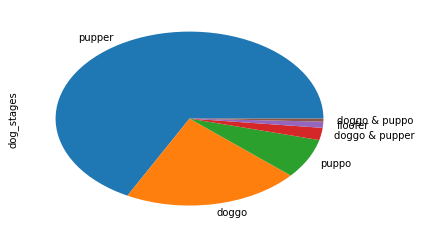

In [8]:
# Show the spread of dog stages among dogs tweeted using pie chart
%matplotlib inline
df_final.dog_stages.value_counts().plot(kind='pie')

It is very obviously shown from the pie chart that pupper is dominant among all dogs tweeted.

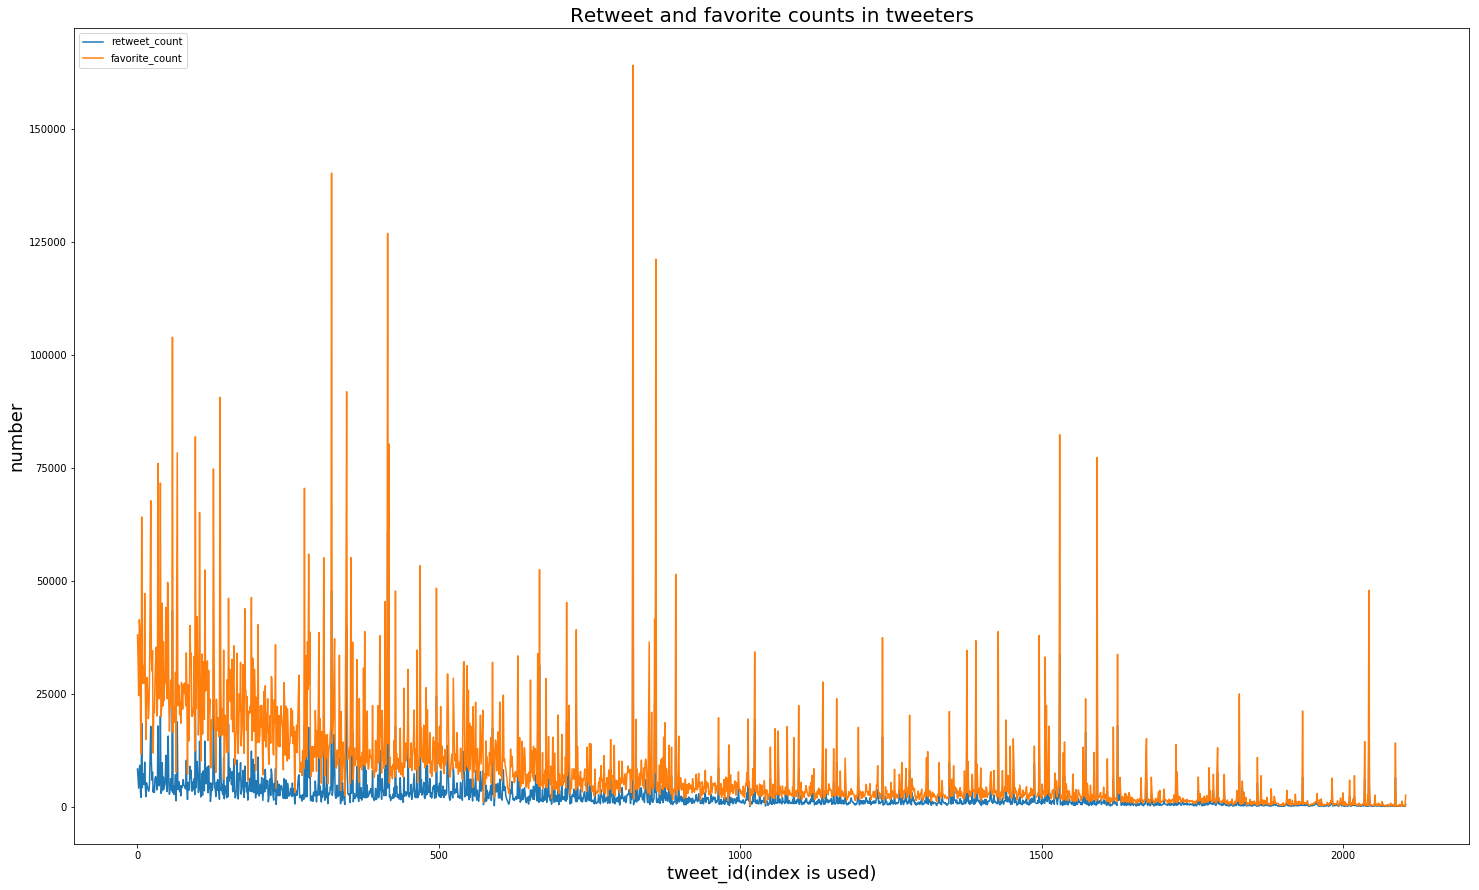

In [9]:
# Draw line chart to show the pattern of retweet and favorite counts among all tweet_id
plt.figure(figsize=(25,15))
plt.plot(df_final.index, df_final['retweet_count'])
plt.plot(df_final.index, df_final['favorite_count'])
plt.legend(['retweet_count', 'favorite_count'], loc='upper left')
plt.xlabel('tweet_id(index is used)', fontsize=18)
plt.ylabel('number', fontsize=18)
plt.title('Retweet and favorite counts in tweeters', fontsize=20)
plt.show()

The figure shows that retweet and favorite counts are in a simliar pattern. A higher retweet count usually comes with a higher favorite count.